# Mermaid AI demonstration

In [1]:
!pip3 install -q -U google-generativeai

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [4]:
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv('API_KEY')

In [5]:
genai.configure(api_key=api_key)

## Avaliable models

* `gemini-1.5-pro`: optimized for high intelligence tasks, the most powerful Gemini model
* `gemini-1.5-flash`: optimized for multi-modal use-cases where speed and cost are important

In [6]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


## Generate text from text inputs

For text-only prompts, use the `gemini-pro` model:

In [7]:
model = genai.GenerativeModel('gemini-1.5-flash')

The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. The available models only support text and images as input, and text as output.

In the simplest case, you can pass a prompt string to the <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a> method:

In [8]:
%%time
response = model.generate_content("Explain what is Mermaid JS and tell its use cases?")

CPU times: user 13.4 ms, sys: 9.33 ms, total: 22.8 ms
Wall time: 6.09 s


In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [9]:
to_markdown(response.text)

> ## What is Mermaid JS?
> 
> Mermaid JS is a JavaScript library that allows you to create **diagrams and flowcharts** directly within your Markdown files. It uses a simple and intuitive syntax to define diagrams and then renders them dynamically into interactive visualizations. 
> 
> **Key features of Mermaid JS:**
> 
> * **Intuitive syntax:** You write diagrams using a simple text-based format that's easy to read and write.
> * **Diverse diagrams:** Supports various diagram types like flowcharts, sequence diagrams, Gantt charts, class diagrams, state diagrams, ER diagrams, and more.
> * **Interactive visualizations:** The rendered diagrams are interactive, allowing users to zoom, pan, and explore the details.
> * **Integration with Markdown:** Seamlessly integrate diagrams into your Markdown files for documentation, presentations, and knowledge sharing.
> * **Customization:** Offers options to customize the appearance of your diagrams with colors, styles, and labels.
> 
> 
> ## Use Cases of Mermaid JS:
> 
> Here are some common use cases of Mermaid JS:
> 
> * **Documentation:** Create clear and concise documentation with visual diagrams explaining processes, workflows, and architecture.
> * **Presentations:** Enhance presentations with dynamic and engaging diagrams that illustrate complex concepts.
> * **Knowledge sharing:** Collaborate effectively by using diagrams to visualize information and share knowledge within teams.
> * **Software development:** Design and document software architectures, workflows, and user interfaces using visual diagrams.
> * **Project management:** Visualize project timelines, dependencies, and progress using Gantt charts.
> * **Education:** Create visual aids for teaching complex topics, like algorithms, data structures, and system design.
> * **Technical documentation:** Document software APIs, libraries, and tools with clear and informative diagrams.
> 
> **Overall, Mermaid JS is a powerful tool for anyone who wants to create and embed visually appealing diagrams into their Markdown files, enhancing communication, documentation, and knowledge sharing.**


If the API failed to return a result, use `GenerateContentResponse.prompt_feedback` to see if it was blocked due to safety concerns regarding the prompt.

In [10]:
base = "Provide me mermaid code for the following usecase. If not specified, create a graph or a flowchart for the situation. Only and only give me the mermaid code, nothing else. No plain text, I am passing this code to an compiler that will generate charts from your response so I dont want any syntax errors. Here is the user query:"

response = model.generate_content(f'{base} Instagram buisness model in vertical graph and sub graphs as well')
to_markdown(response.text)

> ```mermaid
> graph LR
>   subgraph Instagram
>     A[Users] --> B(Content Creation)
>     B --> C{Engagement}
>     C --> D[User Growth]
>     C --> E{Advertising Revenue}
>     E --> F(Business Growth)
>     D --> F
>   end
>   subgraph Content Creation
>     B1[Photos] --> B2(Videos)
>     B2 --> B3{Stories}
>     B3 --> B4[Reels]
>     B4 --> B5(Live Videos)
>     B1 --> B5
>   end
>   subgraph Engagement
>     C1[Likes] --> C2(Comments)
>     C2 --> C3{Shares}
>     C3 --> C4[Saves]
>     C4 --> C5{Follows}
>     C1 --> C5
>   end
>   subgraph Advertising Revenue
>     E1[In-Feed Ads] --> E2(Stories Ads)
>     E2 --> E3{Reels Ads}
>     E3 --> E4[Shopping Ads}
>     E4 --> E5(Influencer Marketing}
>     E1 --> E5
>   end
> ```

In [11]:
response.prompt_feedback

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with <a href="https://ai.google.dev/api/python/google/ai/generativelanguage/GenerateContentResponse#candidates"><code>GenerateContentResponse.candidates</code></a>:

In [12]:
response.candidates

[index: 0
content {
  parts {
    text: "```mermaid\ngraph LR\n  subgraph Instagram\n    A[Users] --> B(Content Creation)\n    B --> C{Engagement}\n    C --> D[User Growth]\n    C --> E{Advertising Revenue}\n    E --> F(Business Growth)\n    D --> F\n  end\n  subgraph Content Creation\n    B1[Photos] --> B2(Videos)\n    B2 --> B3{Stories}\n    B3 --> B4[Reels]\n    B4 --> B5(Live Videos)\n    B1 --> B5\n  end\n  subgraph Engagement\n    C1[Likes] --> C2(Comments)\n    C2 --> C3{Shares}\n    C3 --> C4[Saves]\n    C4 --> C5{Follows}\n    C1 --> C5\n  end\n  subgraph Advertising Revenue\n    E1[In-Feed Ads] --> E2(Stories Ads)\n    E2 --> E3{Reels Ads}\n    E3 --> E4[Shopping Ads}\n    E4 --> E5(Influencer Marketing}\n    E1 --> E5\n  end\n```"
  }
  role: "model"
}
finish_reason: STOP
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content(..., stream=True)</code></a>.

In [13]:
%%time
response = model.generate_content("Explain what is Mermaid JS and tell its use cases?", stream=True)

CPU times: user 3 ms, sys: 2.01 ms, total: 5 ms
Wall time: 569 ms


In [14]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

##
________________________________________________________________________________
 What is Mermaid.js?

Mermaid.js is a JavaScript library that lets
________________________________________________________________________________
 you create diagrams and flowcharts directly within your Markdown files. You write the diagrams
________________________________________________________________________________
 using a simple, intuitive syntax, and Mermaid.js renders them beautifully as interactive visualizations.  

**Key Features:**

* **Simple Syntax:** Mermaid.
________________________________________________________________________________
js uses a very straightforward syntax, making it easy to learn and use. You don't need to be a coding expert to create impressive diagrams.
*
________________________________________________________________________________
 **Interactive and Dynamic:** The generated diagrams are interactive, allowing users to zoom, pan, and explore the data. You can 

When streaming, some response attributes are not available until you've iterated through all the response chunks. This is demonstrated below:

In [15]:
response = model.generate_content("Explain what is Mermaid JS and tell its use cases?", stream=True)

The `prompt_feedback` attribute works:

In [16]:
response.prompt_feedback

But attributes like <code>text</code> do not:

In [17]:
try:
  response.text
except Exception as e:
  print(f'{type(e).__name__}: {e}')

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

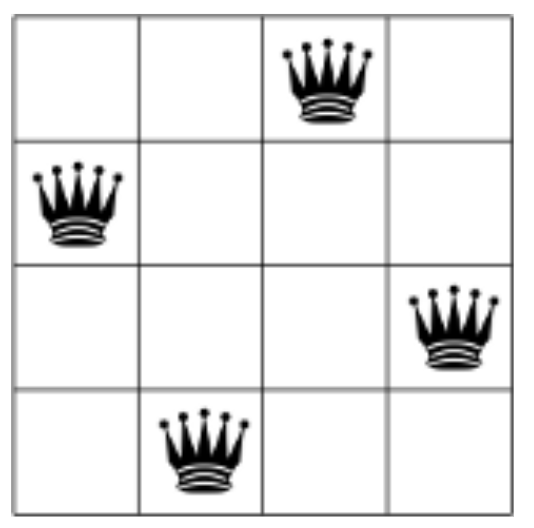

In [18]:
import PIL.Image

img = PIL.Image.open('nqueen.png')
img

Use the `gemini-1.5-flash` model and pass the image to the model with `generate_content`.

In [19]:
model = genai.GenerativeModel('gemini-1.5-flash')

In [20]:
response = model.generate_content(img)

to_markdown(response.text)

> The image shows a 4x4 grid with 4 black queens placed in squares. The queens are placed in the following squares:
> - Top right
> - Middle left
> - Bottom right
> - Bottom left

To provide both text and images in a prompt, pass a list containing the strings and images:

In [21]:
response = model.generate_content([f'{base} This is a classic mathematics and computer science problem that involves using comcepts of backtracking and search algorithms called waterjug problem. Create a flowchart to create an algorithm for solving this problem givin the capacity of the 2 inputs and the expected result', img], stream=True)
response.resolve()

In [22]:
to_markdown(response.text)

> ```mermaid
> graph LR
>     A[Start] --> B{Initialize jug1, jug2, goal}
>     B --> C{Is goal achievable?}
>     C -- No --> F[End: Goal not achievable]
>     C -- Yes --> D{Fill jug1}
>     D --> E{Fill jug2}
>     E --> H{Is jug2 full?}
>     H -- No --> I{Pour jug2 into jug1}
>     I --> E
>     H -- Yes --> J{Empty jug2}
>     J --> E
>     E --> K{Is goal achieved?}
>     K -- No --> D
>     K -- Yes --> F[End: Goal achieved]
> ```

## Chat conversations

Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.

Initialize the chat:

In [23]:
model = genai.GenerativeModel('gemini-1.5-flash')
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
    ),
    history=[]
)

The `ChatSession.send_message` method returns the same `GenerateContentResponse` type as <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>. It also appends your message and the response to the chat history:

In [24]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> A computer is like a really smart toy that follows your instructions by turning them into tiny lights that make it do things! 


In [25]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a really smart toy that follows your instructions by turning them into tiny lights that make it do things! \n"
 }
 role: "model"]

You can keep sending messages to continue the conversation. Use the `stream=True` argument to stream the chat:

In [26]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

Computers
________________________________________________________________________________
 work by taking your instructions, converting them into a binary code of ones and zeros
________________________________________________________________________________
, and then using those codes to manipulate electronic circuits, which ultimately control everything from
________________________________________________________________________________
 displaying images on your screen to playing your favorite music. 

________________________________________________________________________________


`glm.Content` objects contain a list of `glm.Part` objects that each contain either a text (string) or inline_data (`glm.Blob`), where a blob contains binary data and a `mime_type`. The chat history is available as a list of `glm.Content` objects in `ChatSession.history`:

In [27]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer is like a really smart toy that follows your instructions by turning them into tiny lights that make it do things! 


> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: Computers work by taking your instructions, converting them into a binary code of ones and zeros, and then using those codes to manipulate electronic circuits, which ultimately control everything from displaying images on your screen to playing your favorite music. 


## Count tokens

Large language models have a context window, and the context length is often measured in terms of the **number of tokens**. With the Gemini API, you can determine the number of tokens per any `glm.Content` object. In the simplest case, you can pass a query string to the `GenerativeModel.count_tokens` method as follows:

In [28]:
model.count_tokens("Explain what is Mermaid JS and tell its use cases?")

total_tokens: 11

Similarly, you can check `token_count` for your `ChatSession`:

In [29]:
model.count_tokens(chat.history)

total_tokens: 104

## Use embeddings

[Embedding](https://developers.google.com/machine-learning/glossary#embedding-vector) is a technique used to represent information as a list of floating point numbers in an array. With Gemini, you can represent text (words, sentences, and blocks of text) in a vectorized form, making it easier to compare and contrast embeddings. For example, two texts that share a similar subject matter or sentiment should have similar embeddings, which can be identified through mathematical comparison techniques such as cosine similarity. For more on how and why you should use embeddings, refer to the [Embeddings guide](https://ai.google.dev/docs/embeddings_guide).

Use the `embed_content` method to generate embeddings. The method handles embedding for the following tasks (`task_type`):

Task Type | Description
---       | ---
RETRIEVAL_QUERY	| Specifies the given text is a query in a search/retrieval setting.
RETRIEVAL_DOCUMENT | Specifies the given text is a document in a search/retrieval setting. Using this task type requires a `title`.
SEMANTIC_SIMILARITY	| Specifies the given text will be used for Semantic Textual Similarity (STS).
CLASSIFICATION	| Specifies that the embeddings will be used for classification.
CLUSTERING	| Specifies that the embeddings will be used for clustering.

The following generates an embedding for a single string for document retrieval:

In [30]:
result = genai.embed_content(
    model="models/text-embedding-004",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.028545432, 0.044588123, -0.03419736, -0.004266 ... TRIMMED]


Note: The `retrieval_document` task type is the only task that accepts a title.

To handle batches of strings, pass a list of strings in `content`:

In [31]:
result = genai.embed_content(
    model="models/text-embedding-004",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[-0.036453035, 0.03325499, -0.03970925, -0.0026286 ... TRIMMED ...
[-0.01591948, 0.032582667, -0.081024624, -0.011298 ... TRIMMED ...
[0.00037063262, 0.03763057, -0.12269569, -0.009518 ... TRIMMED ...


While the `genai.embed_content` function accepts simple strings or lists of strings, it is actually built around the `glm.Content` type (like <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>). `glm.Content` objects are the primary units of conversation in the API.

While the `glm.Content` object is multimodal, the `embed_content` method only supports text embeddings. This design gives the API the *possibility* to expand to multimodal embeddings.

In [32]:
response.candidates[0].content

parts {
  text: "Computers work by taking your instructions, converting them into a binary code of ones and zeros, and then using those codes to manipulate electronic circuits, which ultimately control everything from displaying images on your screen to playing your favorite music. \n"
}
role: "model"

In [33]:
result = genai.embed_content(
    model = 'models/text-embedding-004',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED ...')

[-0.05092525, 0.025402924, -0.037100997, -0.030644 ... TRIMMED ...


Similarly, the chat history contains a list of `glm.Content` objects, which you can pass directly to the `embed_content` function:

In [34]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a really smart toy that follows your instructions by turning them into tiny lights that make it do things! \n"
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "Computers work by taking your instructions, converting them into a binary code of ones and zeros, and then using those codes to manipulate electronic circuits, which ultimately control everything from displaying images on your screen to playing your favorite music. \n"
 }
 role: "model"]

In [35]:
result = genai.embed_content(
    model = 'models/text-embedding-004',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')

[-0.03417175, 0.005179209, -0.054957863, -0.030872 ... TRIMMED...
[-0.044464022, 0.0033769584, -0.039734624, 0.00052 ... TRIMMED...
[0.032410417, 0.036596797, -0.04735078, -0.0301925 ... TRIMMED...
[-0.05092525, 0.025402924, -0.037100997, -0.030644 ... TRIMMED...


## Advanced use cases

The following sections discuss advanced use cases and lower-level details of the Python SDK for the Gemini API.

### Safety settings

The `safety_settings` argument lets you configure what the model blocks and allows in both prompts and responses. By default, safety settings block content with medium and/or high probability of being unsafe content across all dimensions. Learn more about [Safety settings](https://ai.google.dev/docs/safety_setting).

Enter a questionable prompt and run the model with the default safety settings, and it will not return any candidates:

In [36]:
response = model.generate_content('[Is mermaid js really useful?]')
response.candidates

[index: 0
content {
  parts {
    text: "## Is Mermaid.js Really Useful?\n\nMermaid.js is a **very useful** tool for anyone who needs to **visually represent complex information**, particularly in the realm of **software development and documentation.**\n\nHere\'s why:\n\n**Benefits of Mermaid.js:**\n\n* **Simple Syntax:** Mermaid.js uses a simple, intuitive syntax that is easy to learn and use, even for non-technical users.\n* **Versatile Diagramming:** It supports a wide range of diagram types including:\n    * **Sequence diagrams:** Visualize the flow of events in a process.\n    * **Flowcharts:** Depict decision-making processes and workflows.\n    * **Class diagrams:** Illustrate the relationships between different objects.\n    * **State diagrams:** Show the various states of a system.\n    * **Gantt charts:** Track project timelines and dependencies.\n    * **Entity relationship diagrams (ERDs):** Model database relationships.\n    * **User journey maps:** Visualize the user exp

The `prompt_feedback` will tell you which safety filter blocked the prompt:

In [37]:
response.prompt_feedback

Now provide the same prompt to the model with newly configured safety settings, and you may get a response.

In [38]:
response = model.generate_content('[Is mermaid JS really useful]',
                                  safety_settings={'HARASSMENT':'block_none'})
response.text

"It depends on what you're looking for. Mermaid.js is **useful in specific contexts**, but it's not a silver bullet for all diagramming needs. Here's a breakdown:\n\n**Pros:**\n\n* **Easy to use:** It uses a simple, intuitive syntax that's easy to learn and use, even for non-technical users.\n* **Lightweight:** It's a JavaScript library, so it's lightweight and fast, and doesn't require any special software or installations.\n* **Versatile:** It supports a wide range of diagrams, including flowcharts, sequence diagrams, state diagrams, and more.\n* **Interactive:** You can create interactive diagrams that users can explore and understand better.\n* **Open source:** It's free to use and modify, and has a large and active community.\n\n**Cons:**\n\n* **Limited customization:** While you can customize the appearance of your diagrams to some extent, it's not as flexible as dedicated diagramming software.\n* **Simple diagrams:** It's best suited for creating simple to medium complexity diag

Also note that each candidate has its own `safety_ratings`, in case the prompt passes but the individual responses fail the safety checks.

### Encode messages

The previous sections relied on the SDK to make it easy for you to send prompts to the API. This section offers a fully-typed equivalent to the previous example, so you can better understand the lower-level details regarding how the SDK encodes messages.

Underlying the Python SDK is the <a href="https://ai.google.dev/api/python/google/ai/generativelanguage"><code>google.ai.generativelanguage</code></a> client library:

In [39]:
import google.ai.generativelanguage as glm

The SDK attempts to convert your message to a `glm.Content` object, which contains a list of `glm.Part` objects that each contain either:

1. a <a href="https://www.tensorflow.org/text/api_docs/python/text"><code>text</code></a> (string)
2. `inline_data` (`glm.Blob`), where a blob contains binary `data` and a `mime_type`.

You can also pass any of these classes as an equivalent dictionary.

Note: The only accepted mime types are some image types, `image/*`.

So, the fully-typed equivalent to the previous example is:  

In [40]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(
    glm.Content(
        parts = [
            glm.Part(text="Write a short, engaging blog post based on this picture."),
            glm.Part(
                inline_data=glm.Blob(
                    mime_type='image/jpeg',
                    data=pathlib.Path('nqueen.png').read_bytes()
                )
            ),
        ],
    ),
    stream=True)

In [41]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")

> ## Can you crack the code?
> 
> This puzzle is a classic game of logic.  Can you figure out where the fi... [TRIMMED] ...

In [42]:
to_markdown(response.text)

> ## Can you crack the code?
> 
> This puzzle is a classic game of logic.  Can you figure out where the final crown goes?  There are a few rules to follow.  The goal is to place the crowns so that they don't share a row, column, or diagonal with one another.  
> 
> So, where does the last crown go?  Let us know in the comments! 
> 
> **Hint:**  Think about how the queens are already positioned on the board. 


### Multi-turn conversations

While the `genai.ChatSession` class shown earlier can handle many use cases, it does make some assumptions. If your use case doesn't fit into this chat implementation it's good to remember that `genai.ChatSession` is just a wrapper around <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>. In addition to single requests, it can handle multi-turn conversations.

The individual messages are `glm.Content` objects or compatible dictionaries, as seen in previous sections. As a dictionary, the message requires `role` and `parts` keys. The `role` in a conversation can either be the `user`, which provides the prompts, or `model`, which provides the responses.

Pass a list of `glm.Content` objects and it will be treated as multi-turn chat:

In [43]:
model = genai.GenerativeModel('gemini-1.5-flash')

messages = [
    {'role':'user',
     'parts': ["Briefly explain how a computer works to a young child."]}
]
response = model.generate_content(messages)

to_markdown(response.text)

> Imagine a computer like a really smart toy box! Inside, there are tiny little lights that can be either on or off, just like a light switch.  These lights are called "bits," and they store all the information the computer needs, like pictures, games, and even your favorite songs.
> 
> The computer also has a special part called the "brain," which can read and understand the information stored in the lights. This brain can tell the computer to play a game, show you a picture, or even write a story. 
> 
> When you press a key on your keyboard, the computer reads it and turns some of the little lights on or off, storing the information. Then, the brain uses that information to do what you asked it to do.  It's like giving the computer instructions!
> 
> So, the computer uses tiny lights and a clever brain to do amazing things, just like you use your brain to play games and solve puzzles! 


To continue the conversation, add the response and another message.

Note: For multi-turn conversations, you need to send the whole conversation history with each request. The API is **stateless**.

In [44]:
messages.append({'role':'model',
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["Okay, how about a more detailed explanation to a high school student?"]})

response = model.generate_content(messages)

to_markdown(response.text)

> Think of a computer as a complex machine that speaks a language of ones and zeros, called binary code.  This code is the foundation of everything a computer does. 
> 
> **Here's how it works:**
> 
> * **Hardware:** The physical components of a computer, like the keyboard, mouse, monitor, and the central processing unit (CPU), are all connected and work together. 
> * **CPU (Central Processing Unit):**  The "brain" of the computer, responsible for executing instructions and processing information. It works like a super-fast calculator, performing billions of operations per second.
> * **Memory (RAM):** Like a temporary storage space, RAM holds the data and instructions that the CPU needs to access quickly. It's like a desk where you keep the documents you're currently working on.
> * **Storage:**  Hard drives or SSDs store all the data permanently, like a filing cabinet for all your files and programs.
> * **Input Devices:**  Keyboard, mouse, microphone, etc., allow you to interact with the computer and give it instructions.
> * **Output Devices:** Monitor, speakers, printer, etc., display the results of the computer's work.
> 
> **The Process:**
> 
> 1. **Input:** You interact with the computer through input devices, like typing on the keyboard or clicking the mouse.
> 2. **Instructions:** Your actions are translated into binary code, a series of ones and zeros, which the computer understands.
> 3. **Processing:** The CPU receives these instructions and processes them, performing calculations and manipulating data.
> 4. **Output:** The results are displayed on the monitor, played through speakers, or printed on paper.
> 
> **Operating System:**  A software program like Windows, macOS, or Linux, acts as an intermediary between the hardware and you. It manages the resources, provides a user interface, and allows you to interact with the computer easily.
> 
> **Software:**  Applications like web browsers, games, and productivity programs are run on top of the operating system and interact with the hardware through it.
> 
> **In essence, a computer is a complex system that translates your input into binary code, processes it using its central processing unit, and then displays the results through various output devices.**


### Generation configuration

The `generation_config` argument allows you to modify the generation parameters. Every prompt you send to the model includes parameter values that control how the model generates responses.

In [45]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        temperature=1.0)
)

In [46]:
text = response.text
to_markdown(text)

> Elara, a girl with eyes the color of moss and a spirit as wild as the wind, had always been a collector of stories. She devoured them like candy, each tale a tiny adventure tucked away in her heart. One day, while rummaging through her grandmother’s attic, she stumbled upon a dusty, leather backpack. It was plain, almost unremarkable, but when Elara touched it, a faint warmth spread through her fingertips.
> 
> Ignoring the prickle of unease, she slung it on her back. As she did, the world seemed to shimmer. The attic, once cluttered and grey, became a vibrant forest, alive with rustling leaves and chirping birds. Elara gasped, her heart pounding. Then, the forest faded, leaving behind a backpack that felt strangely lighter.
> 
> Curiosity consumed her. She raced outside, the backpack bouncing against her back. As she ran, the world around her transformed again. A bustling city sprang up, filled with towering buildings and the roar of traffic. Elara found herself amidst a throng of people, their faces a kaleidoscope of emotions. 
> 
> Then, just as quickly, the city dissolved, leaving Elara in her own backyard, the backpack still warm against her skin. Over the ne

## What's next

-   Prompt design is the process of creating prompts that elicit the desired response from language models. Writing well structured prompts is an essential part of ensuring accurate, high quality responses from a language model. Learn about best practices for [prompt writing](https://ai.google.dev/docs/prompt_best_practices).
-   Gemini offers several model variations to meet the needs of different use cases, such as input types and complexity, implementations for chat or other dialog language tasks, and size constraints. Learn about the available [Gemini models](https://ai.google.dev/models/gemini).
-   Gemini offers options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).